In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from mlxtend.evaluate import bias_variance_decomp

In [2]:
# reading our dataframe

insurance = pd.read_csv('insurance.csv')

In [3]:
# getting the data structure

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# calculating statistics for DV 'charges'

insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: >

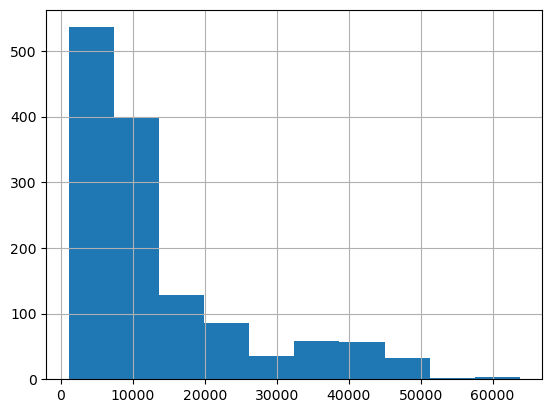

In [5]:
# getting skewed destribution

insurance['charges'].hist()

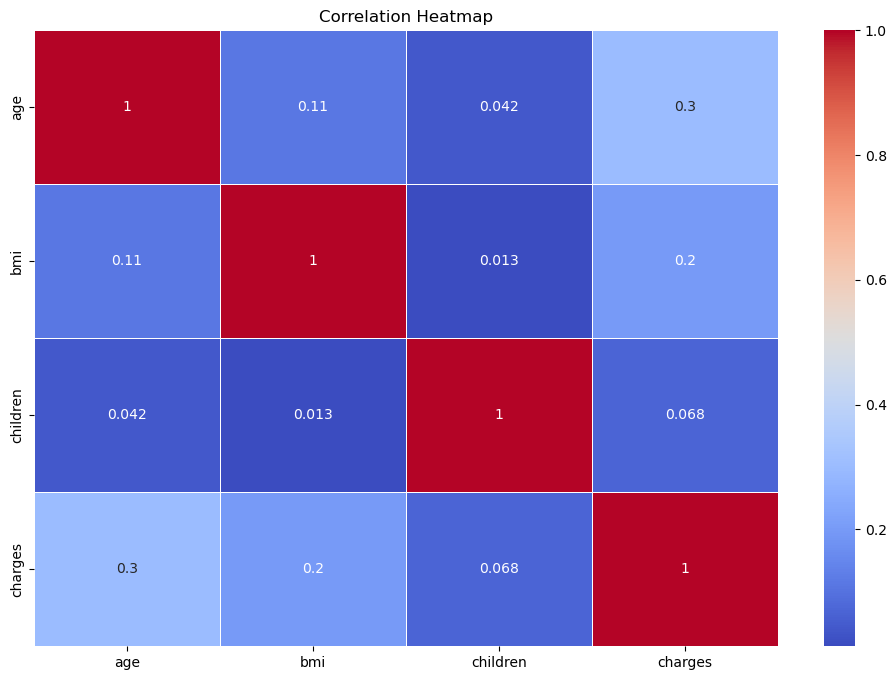

In [6]:
# calculating correlation matrix

correlation_matrix = insurance[['age', 'bmi', "children", "charges"]].corr()

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

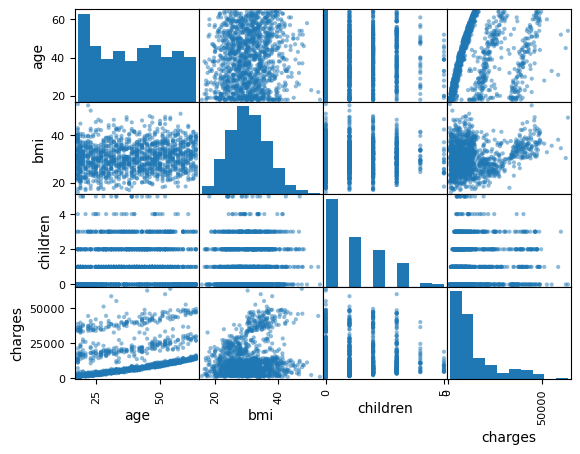

In [7]:
# calculating scatterplot matrix

pd.plotting.scatter_matrix(insurance[['age', 'bmi', 'children', 'charges']])

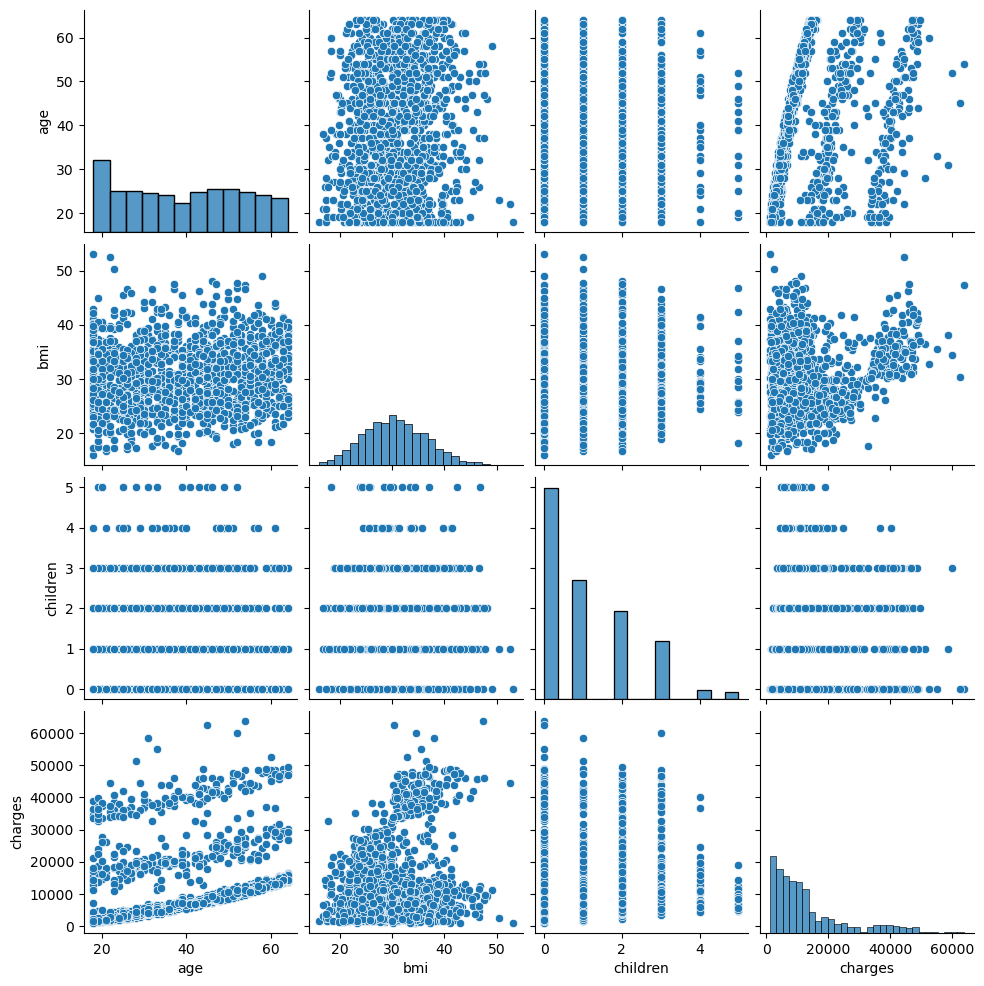

In [8]:
sns.pairplot(insurance[['age', 'bmi', 'children', 'charges']])

In [16]:
# transform data

insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [10]:
# splitting data in training and test data

X, y = insurance.drop(columns=['charges']).to_numpy(), insurance['charges'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Size of train data: {len(X_train)}')
print(f'Size of test data: {len(X_test)}')

Size of train data: 1070
Size of test data: 268


In [11]:
# creating and fitting linear regression model

regr = linear_model.LinearRegression()
regr = regr.fit(X_train, y_train)

In [28]:
# coefficients of model

column_names = insurance.drop(columns=['charges']).columns.tolist()

for item in zip(column_names,regr.coef_):
    print(f'{item[0]}: {item[1]}')

age: 265.2834952467937
bmi: 353.71110797249526
children: 241.13855983155875
sex_female: -121.11038133837287
sex_male: 121.11038133837069
smoker_no: -11860.760270895329
smoker_yes: 11860.760270895324
region_northeast: 261.4846634039244
region_northwest: -36.02081990654408
region_southeast: 71.77326568923836
region_southwest: -297.23710918661857


In [13]:
y_pred = regr.predict(X_test)
r_sq = regr.score(X_train, y_train)

mse=metrics.mean_squared_error(y_test, y_pred) 
adjusted_r_sq = 1 - (1-r_sq)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print('MSE: ', round(mse,4))
print('Multiple R-squared: ', round(r_sq, 4))
print('Adjusted R-squared: ', round(adjusted_r_sq, 4))

MSE:  40402351.4345
Multiple R-squared:  0.7523
Adjusted R-squared:  0.7498


In [30]:
import statsmodels.api as sm

# Assume X and y are your predictors and target respectively

X_train_copy = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train_copy)
results = model.fit()
print(results.summary())

const     2.670819e-01
x1        3.888456e-74
x2        7.866701e-26
x3        1.287935e-03
x4        3.877652e-01
x5        3.711375e-01
x6       5.841183e-202
x7       3.400620e-168
x8        3.682104e-01
x9        9.764055e-01
x10       3.166844e-01
x11       1.919600e-01
Name: P>|t|, dtype: float64


In [15]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        regr, X_train, y_train, X_test, y_test, 
        loss='mse')

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 40651912.640
Average bias: 40316498.740
Average variance: 335413.900


In [34]:
for i in range(1, 11):
    X, y = insurance.drop(columns=['charges']).to_numpy(), insurance['charges'].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    mse=metrics.mean_squared_error(y_test, y_pred) 
    
    print(f'{i}: {round(mse,4)}')

1: 34498536.7239
2: 41826586.6618
3: 33150389.1583
4: 35940857.3699
5: 36679161.8339
6: 44791200.5396
7: 31945008.4355
8: 36950499.0456
9: 35467658.6883
10: 40923068.5762
